#### Install Dependancies

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Load Datasets

In [25]:
vancouver_data = pd.read_csv("vancouver_airbnb.csv", encoding_errors='ignore')

#### Data Exploration

In [26]:
vancouver_data.tail()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5085,1438863953865322490,https://www.airbnb.com/rooms/1438863953865322490,20250612050638,2025-06-21,city scrape,"Luxury Yaletown Stay: Walkable, AC & Free Parking",Welcome to your cozy Yaletown escape with amaz...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,699986412,...,NaN,NaN,NaN,Municipal registration number: 25-201182<br />...,t,1,1,0,0,NaN
5086,1439221734921683979,https://www.airbnb.com/rooms/1439221734921683979,20250612050638,2025-06-21,city scrape,Verde on Beach | Nature-inspired Studio,"Nature-inspired Studio in Downtown, thoughtful...","Nestled along Vancouver’s iconic Seawall, Beac...",https://a0.muscache.com/pictures/miso/Hosting-...,149726446,...,5.0,5.0,5.0,Municipal registration number: 25-202878<br />...,f,1,1,0,0,1.0
5087,1439558102675283954,https://www.airbnb.com/rooms/1439558102675283954,20250612050638,2025-06-21,city scrape,Cozy Guesthouse Close to Mall & Skytrain,"This is our modern, clean & quite private Gues...",NaN,https://a0.muscache.com/pictures/prohost-api/H...,700192130,...,NaN,NaN,NaN,Municipal registration number: 25-157914<br />...,t,1,1,0,0,NaN
5088,1439610665166440655,https://www.airbnb.com/rooms/1439610665166440655,20250612050638,2025-06-21,city scrape,Ubc lucky private room& share bathroom,This unique place has its own unique style.,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,200467062,...,NaN,NaN,NaN,Municipal registration number: 25-157425<br />...,t,7,0,7,0,NaN
5089,1439770345034798920,https://www.airbnb.com/rooms/1439770345034798920,20250612050638,2025-06-21,city scrape,Cozy Family Home in Quiet Vancouver Neighborhood,Welcome to your comfortable and private Vancou...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,333164630,...,NaN,NaN,NaN,Municipal registration number: 25-231859<br />...,t,25,17,8,0,NaN


In [27]:
vancouver_data.shape

(5090, 79)

In [30]:
vancouver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5090 entries, 0 to 5089
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5090 non-null   int64  
 1   listing_url                                   5090 non-null   object 
 2   scrape_id                                     5090 non-null   int64  
 3   last_scraped                                  5090 non-null   object 
 4   source                                        5090 non-null   object 
 5   name                                          5090 non-null   object 
 6   description                                   5032 non-null   object 
 7   neighborhood_overview                         2681 non-null   object 
 8   picture_url                                   5090 non-null   object 
 9   host_id                                       5090 non-null   i

In [31]:
vancouver_data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,5.090000e+03,5.090000e+03,5.090000e+03,5090.000000,5090.000000,0.0,5090.000000,5090.000000,5090.000000,4238.000000,...,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,5090.000000,5090.000000,5090.000000,5090.000000,4446.000000
mean,6.764904e+17,2.025061e+13,2.387038e+08,12.381139,19.664244,NaN,49.261293,-123.110257,3.685855,1.353351,...,4.753812,4.848617,4.863149,4.819197,4.667791,8.114735,6.574853,1.525933,0.012181,1.856316
std,5.474246e+17,1.648599e+00,2.169545e+08,39.206711,55.000297,NaN,0.021254,0.039600,2.137754,0.736071,...,0.462124,0.321781,0.363115,0.294496,0.443032,24.579310,24.150345,5.963554,0.217727,1.828241
min,1.318800e+04,2.025061e+13,6.033000e+03,1.000000,1.000000,NaN,49.202270,-123.217180,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,4.024626e+07,2.025061e+13,3.512954e+07,1.000000,1.000000,NaN,49.248033,-123.129717,2.000000,1.000000,...,4.730000,4.830000,4.872500,4.770000,4.620000,1.000000,1.000000,0.000000,0.000000,0.320000
50%,8.313739e+17,2.025061e+13,1.828981e+08,1.000000,2.000000,NaN,49.266556,-123.111129,4.000000,1.000000,...,4.890000,4.940000,4.960000,4.890000,4.770000,1.000000,1.000000,0.000000,0.000000,1.320000
75%,1.178166e+18,2.025061e+13,4.477137e+08,5.000000,8.000000,NaN,49.278870,-123.085527,4.000000,2.000000,...,4.980000,5.000000,5.000000,5.000000,4.880000,3.000000,2.000000,0.000000,0.000000,2.887500
max,1.439770e+18,2.025061e+13,7.001921e+08,766.000000,942.000000,NaN,49.294360,-123.023864,16.000000,16.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,144.000000,144.000000,51.000000,5.000000,15.820000


#### Data Cleaning

In [33]:
pd.set_option("display.max_rows", 200)     
pd.set_option("display.max_columns", 200)

In [34]:
vancouver_data.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                       58
neighborhood_overview                           2409
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                   1134
host_about                                      2511
host_response_time                               776
host_response_rate                               776
host_acceptance_rate                             570
host_is_superhost                             

In [36]:
vancouver_data = vancouver_data.drop(["calendar_updated", "license", "neighbourhood", "estimated_revenue_l365d", "host_about", "host_location", "host_response_time", "host_response_rate", "host_acceptance_rate", "host_is_superhost", "neighbourhood_group_cleansed"], axis=1)

In [38]:
vancouver_data = vancouver_data.drop(["neighborhood_overview"], axis=1)

In [ ]:
# Remove null values

vancouver_data.dropna(inplace=True)

In [44]:
vancouver_data.isnull().sum()

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
name                                            0
description                                     0
picture_url                                     0
host_id                                         0
host_url                                        0
host_name                                       0
host_since                                      0
host_thumbnail_url                              0
host_picture_url                                0
host_neighbourhood                              0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0


In [46]:
# Check duplicates

vancouver_data.duplicated().sum()

0

In [50]:
vancouver_data.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_thumbnail_url                               object
host_picture_url                                 object
host_neighbourhood                               object
host_listings_count                               int64
host_total_listings_count                         int64
host_verifications                              

In [58]:
# Removing notation from pricing and casting it as a float

vancouver_data["price"] = vancouver_data["price"].replace('[\$,]', "", regex=True).astype(float)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/var/folders/0p/_6483prs69vgz_scs5wdyb940000gn/T/ipykernel_3536/3875527024.py:3: SyntaxWarning: invalid escape sequence '\$'
  vancouver_data["price"] = vancouver_data["price"].replace('[\$,]', "", regex=True).astype(float)


In [59]:
vancouver_data["price"].head()

0    136.0
2     46.0
3    187.0
5     90.0
6     75.0
Name: price, dtype: float64

#### Data Analysis

**Univariate Analysis**

<Axes: xlabel='price'>

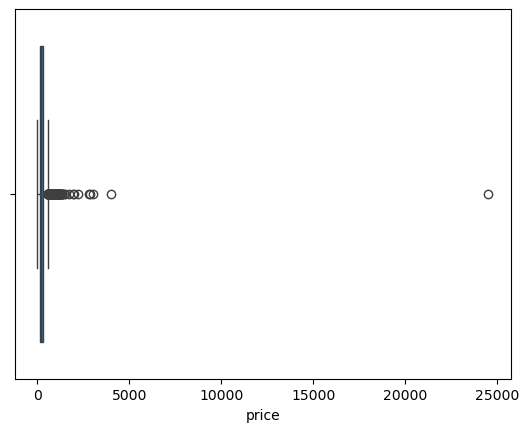

In [60]:
# Outliers

sns.boxplot(data=vancouver_data, x="price")

<Axes: xlabel='price', ylabel='Count'>

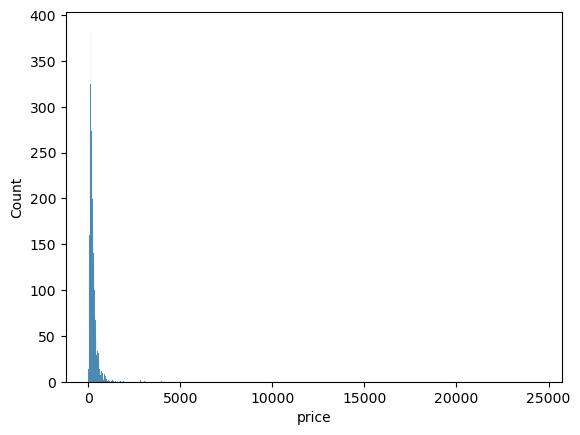

In [61]:
sns.histplot(data=vancouver_data, x="price")

In [71]:
# Removing Outliers

df = vancouver_data[vancouver_data["price"] < 1500]

<Axes: xlabel='price'>

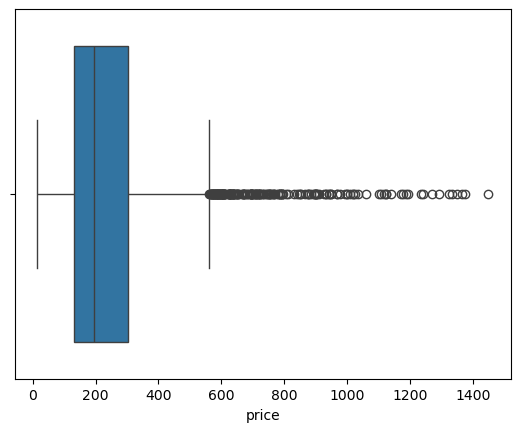

In [72]:
sns.boxplot(data=df, x="price")

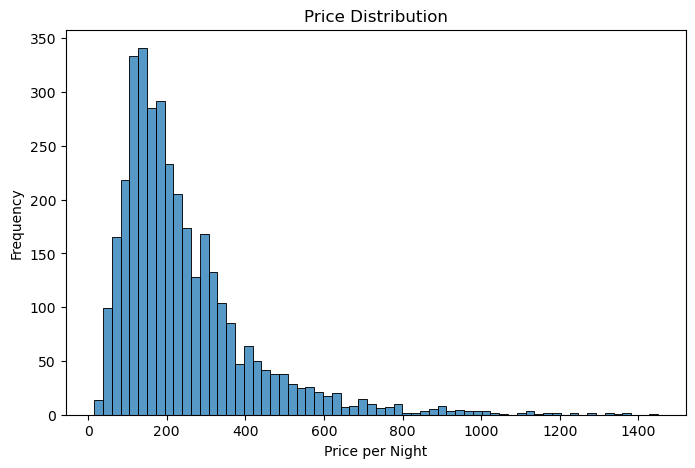

In [79]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="price")
plt.ylabel("Frequency")
plt.xlabel("Price per Night")
plt.title("Price Distribution")
plt.show()

In [75]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'picture_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'av

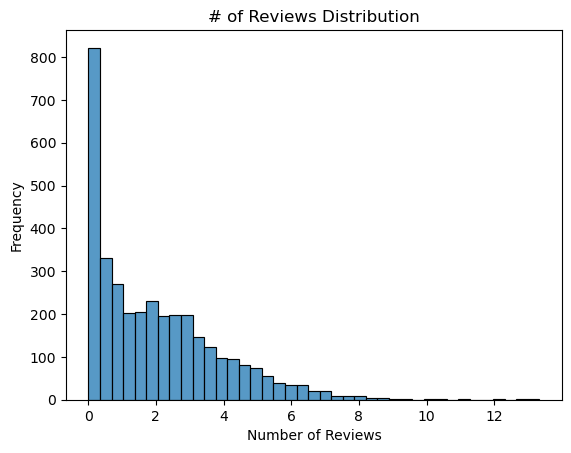

In [80]:
sns.histplot(data=df, x="reviews_per_month")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
plt.title("# of Reviews Distribution")
plt.show()

In [84]:
df.groupby(by="neighbourhood_cleansed")["price"].mean().sort_values()

neighbourhood_cleansed
Marpole                     171.398058
Kerrisdale                  172.000000
Renfrew-Collingwood         172.806250
Fairview                    174.187500
Grandview-Woodland          188.099237
Kensington-Cedar Cottage    192.642857
Victoria-Fraserview         198.070796
Hastings-Sunrise            198.940541
Mount Pleasant              203.362832
Strathcona                  203.588235
Riley Park                  212.644970
Killarney                   212.879310
Sunset                      219.500000
Dunbar Southlands           226.591304
West End                    248.394737
Oakridge                    258.047619
South Cambie                267.285714
Arbutus Ridge               268.573171
Downtown Eastside           278.704348
West Point Grey             295.136364
Kitsilano                   296.387931
Shaughnessy                 303.645833
Downtown                    305.566975
Name: price, dtype: float64

**Feature Engineering**

In [87]:
# Price per Bedroom

df["price_per_bedroom"] = df["price"] / df["bedrooms"].replace(0, 1)

/var/folders/0p/_6483prs69vgz_scs5wdyb940000gn/T/ipykernel_3536/4109732136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price_per_bedroom"] = df["price"] / df["bedrooms"].replace(0, 1)


In [88]:
df["price_per_bedroom"].head()

0    136.0
2     46.0
3    187.0
5     45.0
6     75.0
Name: price_per_bedroom, dtype: float64

In [89]:
df.groupby(by="neighbourhood_cleansed")["price_per_bedroom"].mean().sort_values()

neighbourhood_cleansed
Hastings-Sunrise            104.755225
Marpole                     105.665858
Killarney                   106.896552
Victoria-Fraserview         107.959735
Renfrew-Collingwood         111.089583
Sunset                      112.188205
Oakridge                    113.032011
Kensington-Cedar Cottage    113.781696
Kerrisdale                  119.512963
Dunbar Southlands           128.628696
Fairview                    130.723958
Grandview-Woodland          130.897074
Arbutus Ridge               135.190650
Riley Park                  135.969118
South Cambie                136.130952
Mount Pleasant              142.845575
Shaughnessy                 153.156151
West Point Grey             153.860101
Kitsilano                   175.478376
Strathcona                  182.176471
West End                    186.396930
Downtown Eastside           205.192971
Downtown                    209.129426
Name: price_per_bedroom, dtype: float64

**Bivariate Analysis**

Text(0.5, 1.0, 'Price by Neighbourhood Distribution')

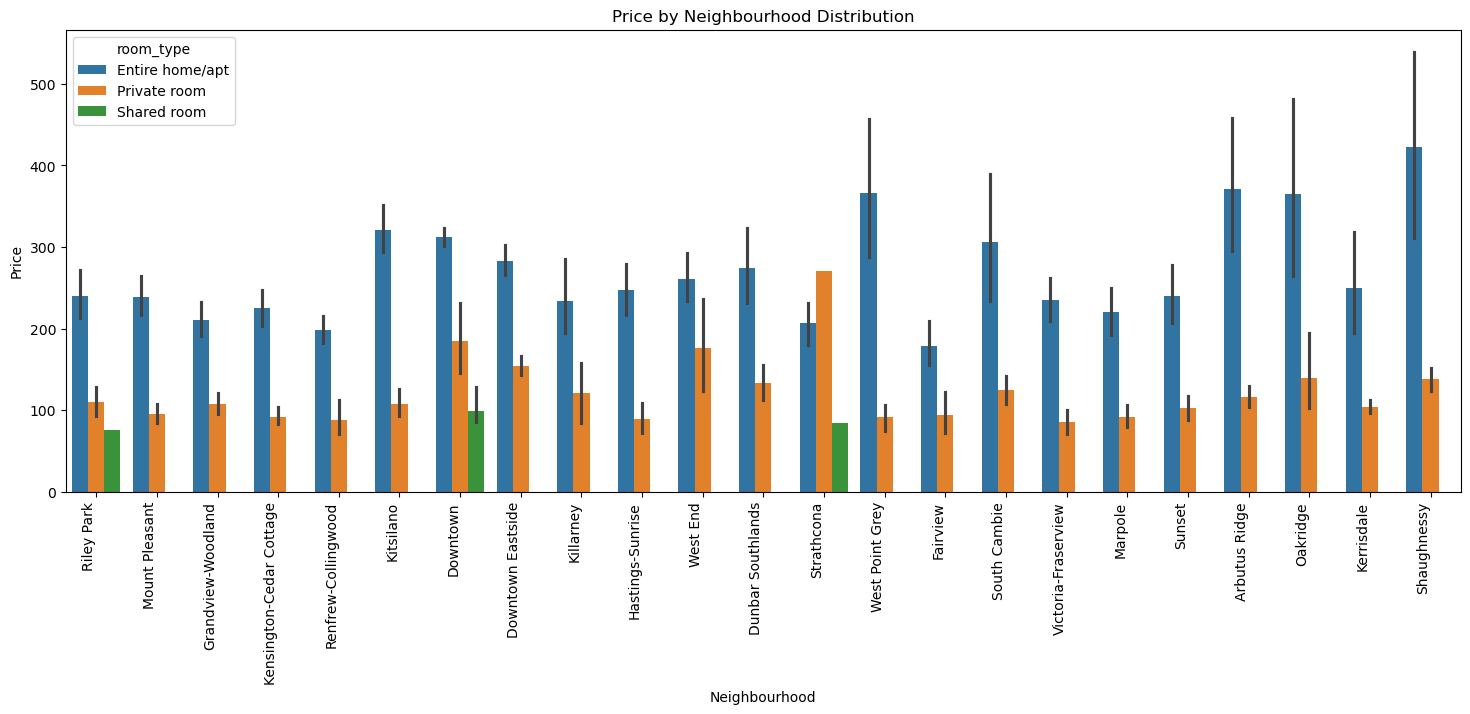

In [97]:
plt.figure(figsize=(18, 6))
plt.xticks(rotation=90, ha="right")
sns.barplot(data=df, x="neighbourhood_cleansed", y="price", hue="room_type")
plt.xlabel("Neighbourhood")
plt.ylabel("Price")
plt.title("Price by Neighbourhood Distribution")

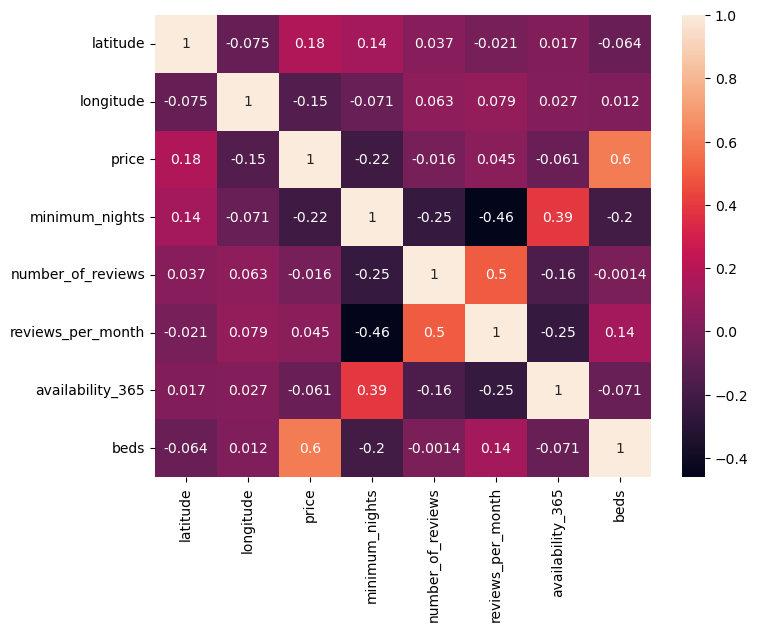

In [109]:
corr = df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'beds']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(data=corr, annot=True)
plt.show()

Text(0.5, 1.0, 'Number of Listings by Neighbourhood and Room Type')

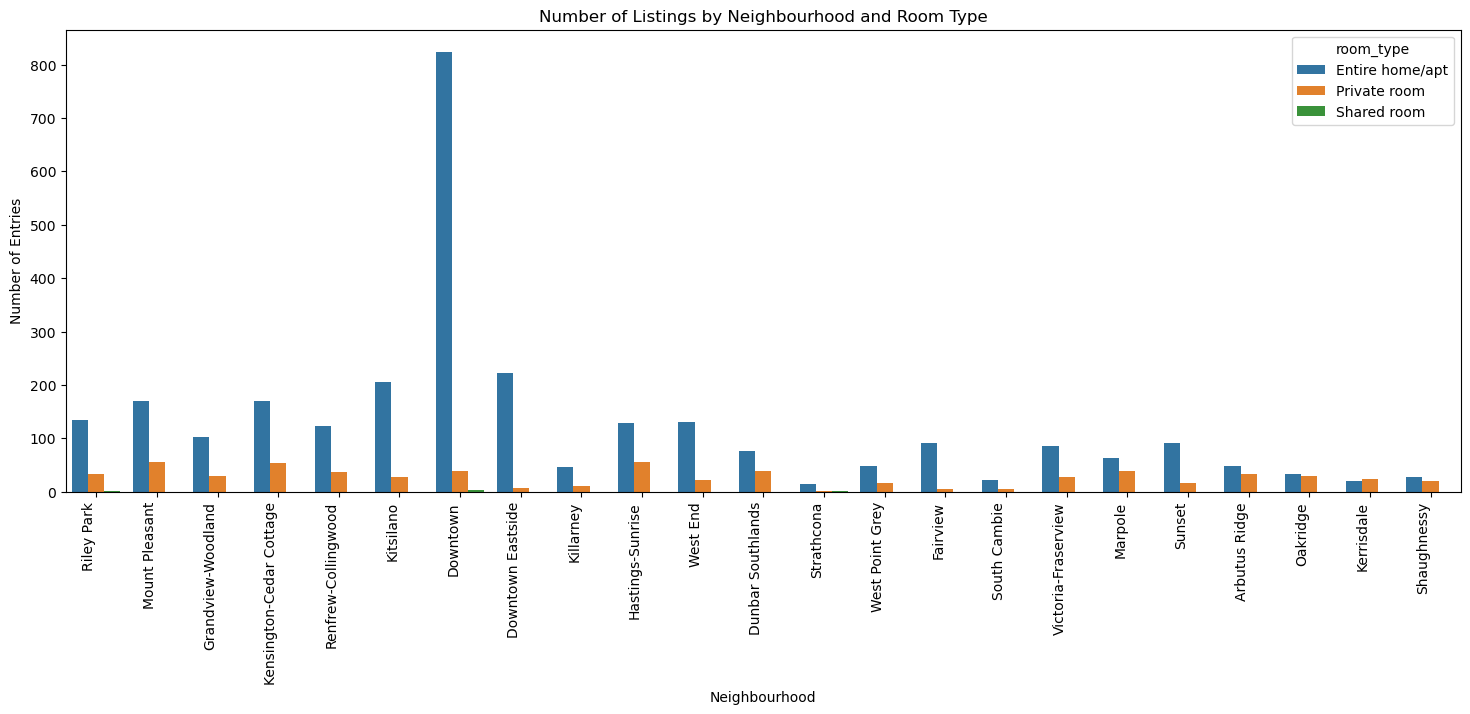

In [107]:
plt.figure(figsize=(18, 6))
plt.xticks(rotation=90, ha="right")
sns.countplot(data=df, x="neighbourhood_cleansed", hue="room_type")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of Entries")
plt.title("Number of Listings by Neighbourhood and Room Type")

In [110]:
df.to_csv("vancouver_cleaned_data.csv", index=False)